In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

In [4]:
layer = keras.layers
print("tensorflow version check : ", tf.__version__)
print("gpu check", tf.test.is_gpu_available())


tensorflow version check :  2.0.0-rc2
gpu check True


# 1. get dataset on memory

In [8]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("mnist dataset on memory")
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
print("The shape of train dataset : ", x_train.shape)
print("The shape of test dataset : ", x_test.shape)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(5000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).shuffle(5000).batch(32)

11493376/11490434 [==============================] - 0s 0us/step
mnist dataset on memory
The shape of train dataset :  (60000, 28, 28, 1)
The shape of test dataset :  (10000, 28, 28, 1)


# 2. model definition

In [0]:
inputs = keras.Input(shape=(28, 28, 1))
#padding 을 넣어야 데이터 손실 없어
#현재의 값은 padding 이 없어서 손실이 계속 일어나는것을 다음 셀코드에서 확인 가능
feature = layer.Conv2D(32, 3,activation='relu')(inputs)
feature = layer.MaxPool2D(pool_size=(2, 2))(feature)
feature = layer.Conv2D(64, 3, activation='relu')(feature)
feature = layer.MaxPool2D(pool_size=(2, 2))(feature)
flatten = layer.Flatten()(feature)
embedding = layer.Dense(128, activation='relu')(flatten)
prob = layer.Dense(10, activation='softmax')(embedding)
model = keras.Model(inputs, prob)

In [6]:
model.summary()

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928

In [7]:
print('========================Training===============================')

model.fit(x_train, y_train, epochs=5)

print('========================Evaluation===============================')

test_loss, test_acc = model.evaluate(test_ds)

# del model
# keras.backend.clear_session()

========================Training===============================
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.1185 - sparse_categorical_accuracy: 0.9634
Epoch 2/5
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0420 - sparse_categorical_accuracy: 0.9870
Epoch 3/5
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.0304 - sparse_categorical_accuracy: 0.9910
Epoch 4/5
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0249 - sparse_categorical_accuracy: 0.9927
Epoch 5/5
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0205 - sparse_categorical_accuracy: 0.9938
========================Evaluation===============================
313/313 [==============================] - 4s 13ms/step - loss: 0.0420 - sparse_categorical_accuracy: 0.9887


# 3. Noise image problem?

In [13]:
[fashine_train_x, fashine_train_y], [fashine_test_x, fashine_test_y] = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
tmp_data = fashine_train_x[1]/255.0

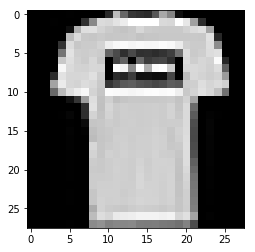

In [15]:
from matplotlib import pyplot as plt

plt.imshow(tmp_data, cmap='gray')

In [16]:
tmp_data = tf.reshape(tmp_data, [1, 28, 28, 1])
model.predict(tmp_data)

array([[6.6325284e-04, 1.5889524e-02, 1.2369020e-03, 1.8869537e-03,
        4.7202056e-04, 7.8764008e-03, 2.7534676e-01, 1.8406023e-01,
        5.1242727e-01, 1.4063712e-04]], dtype=float32)

# I will show you a modified model for solving this!

In [0]:
# 아래 코드를 고쳐보세요!

inputs = keras.Input(shape=(28, 28, 1))
feature = layer.Conv2D(32, 3,activation='relu')(inputs)
feature = layer.MaxPool2D(pool_size=(2, 2))(feature)
feature = layer.Conv2D(64, 3, activation='relu')(feature)
feature = layer.MaxPool2D(pool_size=(2, 2))(feature)
flatten = layer.Flatten()(feature)
embedding = layer.Dense(128, activation='relu')(flatten)
score = layer.Dense(10, activation=None)(embedding)
#score값을 확률로
prob = tf.keras.activations.softmax(score)
model = keras.Model(inputs, prob)

In [6]:
model.summary()

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928

In [9]:
print('========================Training===============================')

model.fit(x_train, y_train, epochs=5)

print('========================Evaluation===============================')

test_loss, test_acc = model.evaluate(test_ds)

# del model
# keras.backend.clear_session()

========================Training===============================
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 265us/sample - loss: 0.1216 - sparse_categorical_accuracy: 0.9615
Epoch 2/5
60000/60000 [==============================] - 12s 195us/sample - loss: 0.0426 - sparse_categorical_accuracy: 0.9870
Epoch 3/5
60000/60000 [==============================] - 12s 195us/sample - loss: 0.0305 - sparse_categorical_accuracy: 0.9913
Epoch 4/5
60000/60000 [==============================] - 12s 194us/sample - loss: 0.0240 - sparse_categorical_accuracy: 0.9930
Epoch 5/5
60000/60000 [==============================] - 12s 194us/sample - loss: 0.0204 - sparse_categorical_accuracy: 0.9941
========================Evaluation===============================
313/313 [==============================] - 1s 4ms/step - loss: 0.0312 - sparse_categorical_accuracy: 0.9907


In [0]:
input_data = model.get_layer('input_2').input
scores = model.get_layer('dense_1').output
prob = model.get_layer('tf_op_layer_Softmax').output

In [0]:
test = tf.keras.Model(inputs = input_data , outputs = [scores,prob])

In [19]:
model.predict(tmp_data)

array([[6.6325284e-04, 1.5889524e-02, 1.2369020e-03, 1.8869537e-03,
        4.7202056e-04, 7.8764008e-03, 2.7534676e-01, 1.8406023e-01,
        5.1242727e-01, 1.4063712e-04]], dtype=float32)

In [20]:
test.predict(tmp_data)

[array([[-13.215292 , -10.039033 , -12.592083 , -12.169729 , -13.555426 ,
         -10.740822 ,  -7.1866617,  -7.58943  ,  -6.565534 , -14.766266 ]],
       dtype=float32),
 array([[6.6325284e-04, 1.5889524e-02, 1.2369020e-03, 1.8869537e-03,
         4.7202056e-04, 7.8764008e-03, 2.7534676e-01, 1.8406023e-01,
         5.1242727e-01, 1.4063712e-04]], dtype=float32)]